In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib._color_data as mcd

In [2]:
# set up colors for plotting
color1 = mcd.CSS4_COLORS['lightblue']
color2 = mcd.CSS4_COLORS['green']
color3 = mcd.CSS4_COLORS['pink']
color4 = mcd.CSS4_COLORS['orangered']
color5 = mcd.CSS4_COLORS['purple']

## Plot data in diffusion map

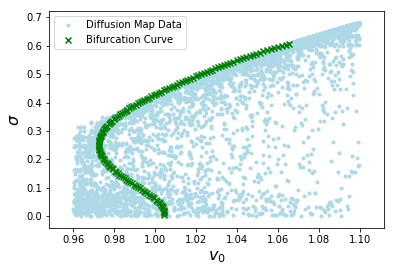

In [3]:
numCars = 30

# plot all data in the diffusion map
data = np.loadtxt(open("data/data_full.csv", "rb"), delimiter=",")
vel = data[:, -1]
hways = np.loadtxt(open("data/data_headways.csv", "rb"), delimiter=",")
s = np.std(hways, axis = 0)
m = np.argmax(hways, axis = 0)
plt.scatter(vel, s, c=color1, marker = '.', label = 'Diffusion Map Data')

# plot the true bifurcation curve for reference
micro = np.loadtxt(open("results/microBif.csv", "rb"), delimiter=",")
plt.scatter(micro[-1, :], np.std(micro[0:numCars, :], axis = 0), c = color2, marker = 'x', 
                  label = 'Bifurcation Curve')
plt.xlabel('$v_0$', fontsize = 16)
plt.ylabel('$\sigma$',fontsize = 16)
plt.legend(loc='upper left', fontsize = 10)
plt.show()

## Plot data histograms 

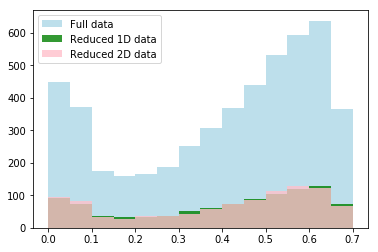

In [4]:
reduced1D = np.loadtxt(open("data/1000data1D.csv", "rb"), delimiter=",")
reduced2D = np.loadtxt(open("data/1000data2D.csv", "rb"), delimiter=",")
s1 = np.std(reduced1D, axis = 0)
s2 = np.std(reduced2D, axis = 0)

bins = np.linspace(0, 0.7, 15)
plt.hist(s, bins, color=color1, alpha=0.8, label='Full data')
plt.hist(s1, bins, color=color2, alpha=0.8, label='Reduced 1D data')
plt.hist(s2, bins, color=color3, alpha=0.8, label='Reduced 2D data')
plt.legend(loc='upper left', fontsize = 10)
plt.show()

## Plot diffusion map embeddings

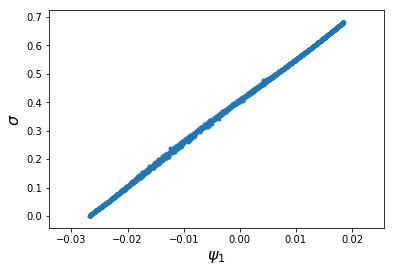

In [5]:
# plot all data in the 1D diffusion map
embed1D = np.loadtxt(open("results/embedding1D.csv", "rb"), delimiter=",")
plt.scatter(embed1D, s, marker = '.')
plt.xlabel("$\psi_1$",  fontsize = 16)
plt.ylabel("$\sigma$",  fontsize = 16)
plt.show()

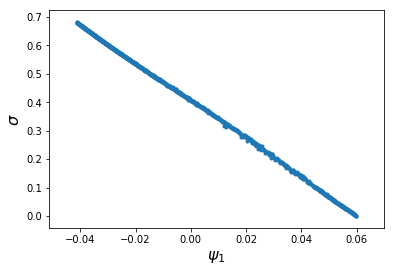

In [6]:
# plot all data in the reduced 1D diffusion map
embed1D_reduced = np.loadtxt(open("results/1000embedding1D.csv", "rb"), delimiter=",")
plt.scatter(embed1D_reduced, s1, marker = '.')
plt.xlabel("$\psi_1$",  fontsize = 16)
plt.ylabel("$\sigma$",  fontsize = 16)
plt.show()

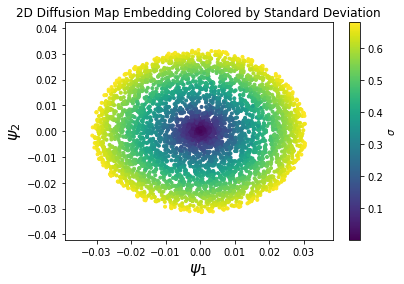

In [7]:
# plot all data in the 2D diffusion map
embed2D = np.loadtxt(open("results/embedding2D.csv", "rb"), delimiter=",")
plt.scatter(embed2D[:,0], embed2D[:,1], marker = '.', c=s)
plt.title("2D Diffusion Map Embedding Colored by Standard Deviation")
plt.colorbar(label = '$\sigma$')
plt.xlabel("$\psi_1$",  fontsize = 16)
plt.ylabel("$\psi_2$",  fontsize = 16)
plt.show()

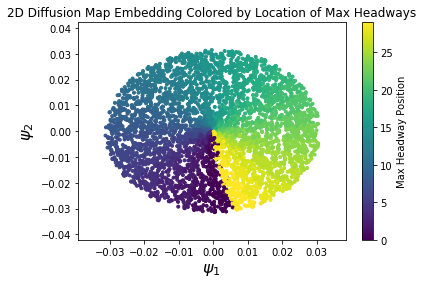

In [8]:
plt.scatter(embed2D[:,0], embed2D[:,1], marker = '.', c=m)
plt.title("2D Diffusion Map Embedding Colored by Location of Max Headways")
plt.colorbar(label = 'Max Headway Position')
plt.xlabel("$\psi_1$",  fontsize = 16)
plt.ylabel("$\psi_2$",  fontsize = 16)
plt.show()

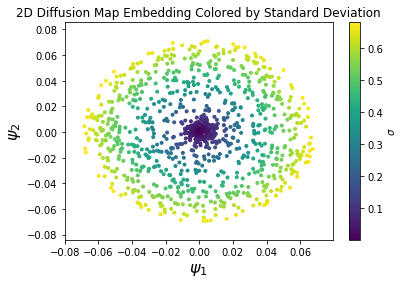

In [9]:
# plot all data in the reduced 2D diffusion map
embed2D_reduced = np.loadtxt(open("results/1000embedding2D.csv", "rb"), delimiter=",")
plt.scatter(embed2D_reduced[:,0], embed2D_reduced[:,1], marker = '.', c=s2)
plt.title("2D Diffusion Map Embedding Colored by Standard Deviation")
plt.colorbar(label = '$\sigma$')
plt.xlabel("$\psi_1$",  fontsize = 16)
plt.ylabel("$\psi_2$",  fontsize = 16)
plt.show()

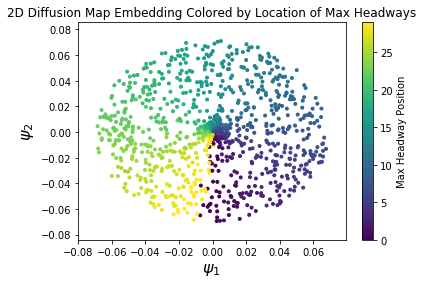

In [10]:
m2 = np.argmax(reduced2D, axis = 0)
plt.scatter(embed2D_reduced [:,0], embed2D_reduced [:,1], marker = '.', c=m2)
plt.title("2D Diffusion Map Embedding Colored by Location of Max Headways")
plt.colorbar(label = 'Max Headway Position')
plt.xlabel("$\psi_1$",  fontsize = 16)
plt.ylabel("$\psi_2$",  fontsize = 16)
plt.show()

## Plot linear fit coefficients

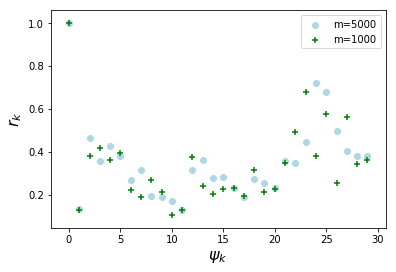

In [11]:
r1 = np.loadtxt(open("results/r1.csv", "rb"), delimiter=",")
r1_reduced = np.loadtxt(open("results/r1_reduced.csv", "rb"), delimiter=",")

plt.scatter(range(numCars), r1, c=color1, label = 'm=5000')
plt.scatter(range(numCars), r1_reduced, c=color2, marker = '+', label = 'm=1000')
plt.legend()
plt.xlabel("$\psi_k$",  fontsize = 16)
plt.ylabel("$r_k$",  fontsize = 16)
plt.show()

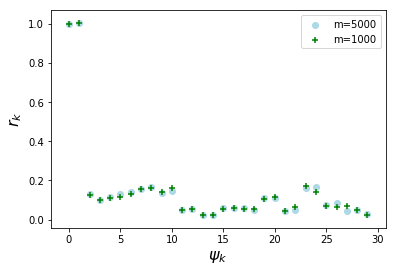

In [12]:
r2 = np.loadtxt(open("results/r2.csv", "rb"), delimiter=",")
r2_reduced = np.loadtxt(open("results/r2_reduced.csv", "rb"), delimiter=",")

plt.scatter(range(numCars), r2, c=color1, label = 'm=5000')
plt.scatter(range(numCars), r2_reduced, c=color2, marker = '+',label = 'm=1000')
plt.legend()
plt.xlabel("$\psi_k$",  fontsize = 16)
plt.ylabel("$r_k$",  fontsize = 16)
plt.show()

## Test operators 

In [13]:
lift1D = np.loadtxt(open("results/lifttTest1D.csv", "rb"), delimiter=",")
restrict1D = np.loadtxt(open("results/restrictTest1D.csv", "rb"), delimiter=",")
lift2D = np.loadtxt(open("results/liftTest2D.csv", "rb"), delimiter=",")
restrict2D = np.loadtxt(open("results/restrictTest2D.csv", "rb"), delimiter=",")

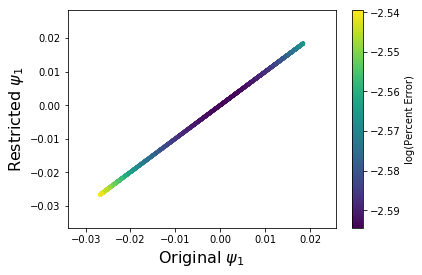

In [14]:
# 1D restriction test
plt.scatter(embed1D, restrict1D[:,1], marker = '.', c = np.log10( restrict1D[:,0] ) )
plt.xlabel("Original $\psi_1$",  fontsize = 16)
plt.ylabel("Restricted $\psi_1$",  fontsize = 16)
plt.colorbar(label = 'log(Percent Error)')
plt.show()

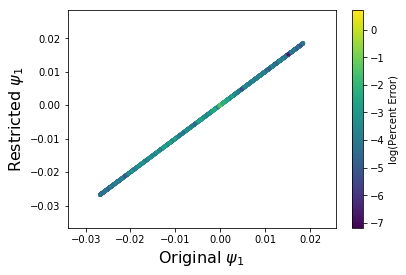

In [15]:
# 1D lifting test
plt.scatter(embed1D, lift1D[:,1], marker = '.', c = np.log10(lift1D[:,0]))
plt.xlabel("Original $\psi_1$",  fontsize = 16)
plt.ylabel("Restricted $\psi_1$",  fontsize = 16)
plt.colorbar(label = 'log(Percent Error)')
plt.show()

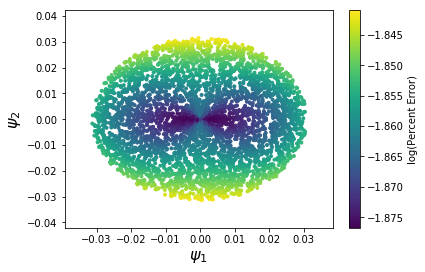

In [16]:
# plot the 2D restriction test
plt.scatter(embed2D[:,0], embed2D[:,1], marker = '.', c= np.log10( restrict2D[:,0]))
plt.xlabel("$\psi_1$",  fontsize = 16)
plt.ylabel("$\psi_2$",  fontsize = 16)
plt.colorbar(label = 'log(Percent Error)')
plt.show()

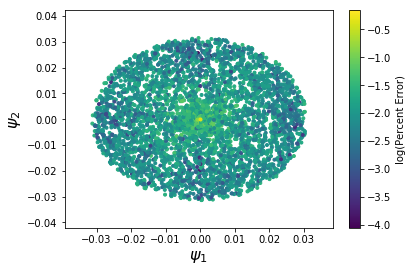

In [17]:
# plot the 2D lifting test
plt.scatter(embed2D[:,0], embed2D[:,1], marker = '.', c= np.log10( lift2D[:,0]) )
plt.xlabel("$\psi_1$",  fontsize = 16)
plt.ylabel("$\psi_2$",  fontsize = 16)
plt.colorbar(label = 'log(Percent Error)')
plt.show()

## Plot bifurcation diagrams

In [18]:
efd1D = np.loadtxt(open("results/bifurcation1D.csv", "rb"), delimiter=",")
efd1D_1000 = np.loadtxt(open("results/1000bifurcation1D.csv", "rb"), delimiter=",")
efd2D = np.loadtxt(open("results/bifurcation2D.csv", "rb"), delimiter=",")
efd2D_1000 = np.loadtxt(open("results/1000bifurcation2D.csv", "rb"), delimiter=",")

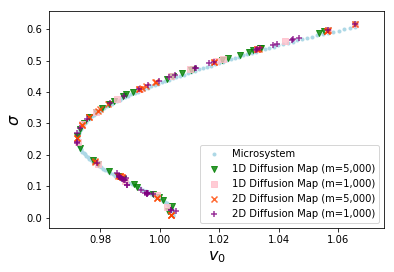

In [19]:
# plot all bifurcation diagrams together in sigma
alpha_level = 0.8
plt.scatter(micro[-1, :], np.std(micro[0:numCars, :], axis = 0), c=color1, marker = '.', 
                  label = 'Microsystem')
plt.scatter(efd1D[1,:], efd1D[-1,:], c=color2, marker = 'v', alpha = alpha_level,  
            label = '1D Diffusion Map (m=5,000)')
plt.scatter(efd1D_1000[1,:], efd1D_1000[-1,:], c=color3, marker = 's',  alpha = alpha_level, 
            label = '1D Diffusion Map (m=1,000)')
plt.scatter(efd2D[2,:], efd2D[-1,:], c=color4,  marker = 'x',  
            alpha = alpha_level,  label = '2D Diffusion Map (m=5,000)')
plt.scatter(efd2D_1000[2,:], efd2D_1000[-1,:], c=color5, marker = '+',
            alpha = alpha_level, label = '2D Diffusion Map (m=1,000)')
plt.legend(loc='lower right', fontsize = 10)
plt.xlabel('$v_0$', size=16)
plt.ylabel('$\sigma$', size=16)
plt.show()

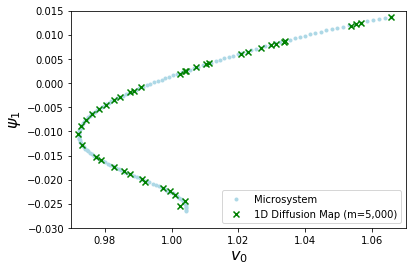

In [20]:
# plot the full 1D bifurcation curve 
micro1D = np.loadtxt(open("results/micro1D.csv", "rb"), delimiter=",")
plt.scatter(micro1D[:,1], micro1D[:,0], c=color1, marker = '.', label = 'Microsystem')
plt.scatter(efd1D[1,:], efd1D[0,:], c=color2, marker = 'x', label = '1D Diffusion Map (m=5,000)')
plt.legend(loc='lower right', fontsize = 10)
plt.xlabel('$v_0$', size=16)
plt.ylabel('$\psi_1$', size=16)
plt.xlim([0.97, 1.07])
plt.ylim([-0.03, 0.015])
plt.show()

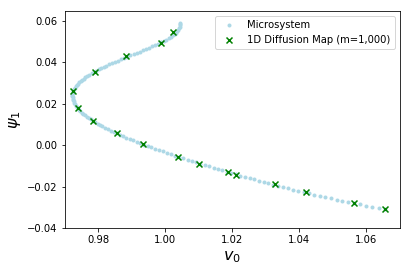

In [21]:
# plot the full 1D bifurcation curve 
micro1D_reduced = np.loadtxt(open("results/1000micro1D.csv", "rb"), delimiter=",")
plt.scatter(micro1D_reduced[:,1], micro1D_reduced[:,0], c=color1, marker = '.', label = 'Microsystem')
plt.scatter(efd1D_1000[1,:], efd1D_1000[0,:], marker = 'x', c=color2,  label = '1D Diffusion Map (m=1,000)')
plt.legend(loc='upper right', fontsize = 10)
plt.xlabel('$v_0$', size=16)
plt.ylabel('$\psi_1$', size=16)
plt.xlim([0.97, 1.07])
plt.ylim([-0.04, 0.065])
plt.show()

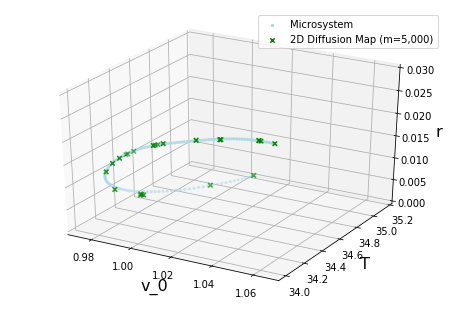

In [22]:
# plot the 2d bifurcation diagrams 
micro2D = np.loadtxt(open("results/micro2D.csv", "rb"), delimiter=",")
fig = plt.figure()
ax = Axes3D(fig)
alpha_level = 0.6
ax.scatter(micro2D[:,2], micro2D[:,1],micro2D[:,0], marker = '.',
            c=color1, label = 'Microsystem')
ax.scatter(efd2D[2,:], efd2D[1,:], efd2D[0,:], marker = 'x',  
            c=color2,  label = '2D Diffusion Map (m=5,000)')
ax.legend(fontsize = 10)
ax.set_xlabel('v_0', size=16)
ax.set_ylabel('T', size=16)
ax.set_zlabel('r', size = 16)
ax.set_xlim([0.97, 1.07])
ax.set_ylim([33.95, 35.2])
ax.set_zlim([0, 0.03])
plt.show()

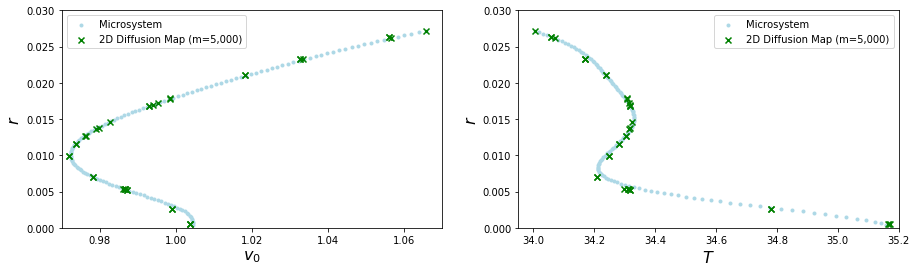

In [23]:
plt.figure(figsize=(15, 4))
ax = plt.subplot(1, 2, 1)
ax.scatter(micro2D[:,2], micro2D[:,0], c=color1, marker = '.', label = 'Microsystem')
ax.scatter(efd2D[2,:], efd2D[0,:], c=color2, marker = 'x', label = '2D Diffusion Map (m=5,000)')
ax.legend(loc='upper left', fontsize = 10)
plt.xlabel('$v_0$', size=16)
plt.ylabel('$r$', size=16)
plt.xlim([0.97, 1.07])
plt.ylim([0, 0.03])

ax = plt.subplot(1, 2, 2)
ax.scatter(micro2D[:,1], micro2D[:,0], c=color1, marker = '.', label = 'Microsystem')
ax.scatter(efd2D[1,:], efd2D[0,:], c=color2, marker = 'x', label = '2D Diffusion Map (m=5,000)')
ax.legend(loc='upper right', fontsize = 10)
plt.ylabel('$r$', size=16)
plt.xlabel('$T$', size=16)
plt.ylim([0, 0.03])
plt.xlim([33.95, 35.2])

plt.show()

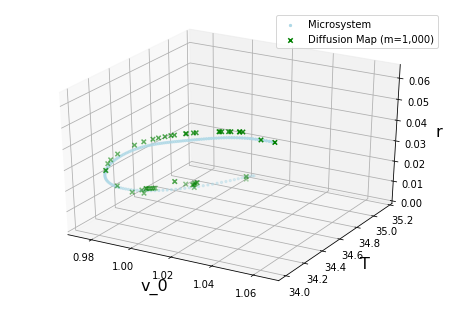

In [24]:
# plot the 2d bifurcation diagrams 
micro2D_reduced = np.loadtxt(open("results/1000micro2D.csv", "rb"), delimiter=",")
fig = plt.figure()
ax = Axes3D(fig)
alpha_level = 0.6
ax.scatter(micro2D_reduced[:,2], micro2D_reduced[:,1],micro2D_reduced[:,0], marker = '.',
            c=color1, label = 'Microsystem')
ax.scatter(efd2D_1000[2,:], efd2D_1000[1,:], efd2D_1000[0,:], marker = 'x',  
            c=color2,  label = 'Diffusion Map (m=1,000)')
ax.legend(fontsize = 10)
ax.set_xlabel('v_0', size=16)
ax.set_ylabel('T', size=16)
ax.set_zlabel('r', size = 16)
ax.set_xlim([0.97, 1.07])
ax.set_ylim([33.95, 35.2])
ax.set_zlim([0, 0.065])
plt.show()

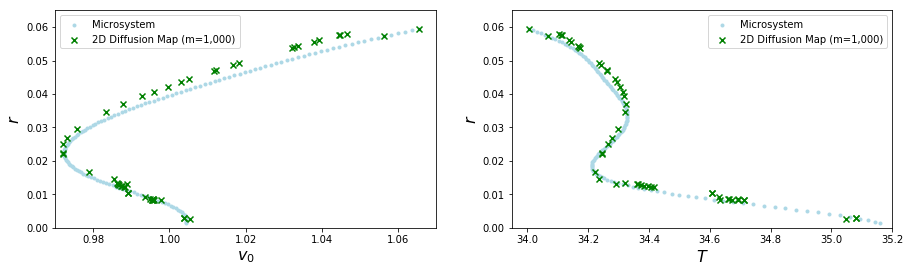

In [25]:
plt.figure(figsize=(15, 4))
ax = plt.subplot(1, 2, 1)
ax.scatter(micro2D_reduced[:,2], micro2D_reduced[:,0],c=color1, marker = '.', label = 'Microsystem')
ax.scatter(efd2D_1000[2,:], efd2D_1000[0,:], c=color2,marker = 'x',  label = '2D Diffusion Map (m=1,000)')
ax.legend(loc='upper left', fontsize = 10)
plt.xlabel('$v_0$', size=16)
plt.ylabel('$r$', size=16)
plt.xlim([0.97, 1.07])
plt.ylim([0, 0.065])

ax = plt.subplot(1, 2, 2)
ax.scatter(micro2D_reduced[:,1], micro2D_reduced[:,0], c=color1, marker = '.', label = 'Microsystem')
ax.scatter(efd2D_1000[1,:], efd2D_1000[0,:], c=color2, marker = 'x', label = '2D Diffusion Map (m=1,000)')
ax.legend(loc='upper right', fontsize = 10)
plt.ylabel('$r$', size=16)
plt.xlabel('$T$', size=16)
plt.ylim([0, 0.065])
plt.xlim([33.95, 35.2])

plt.show()